# **Домашнее задание по линейной регрессии**

**Цель задания:**
Основная цель этого задания - понять и применить концепцию линейной регрессии на реальных данных. Вам предлагается использовать набор данных "California Housing Prices", чтобы построить модель, которая может предсказать среднюю стоимость жилья (`median_house_value`) на основе различных связанных атрибутов.

Вы научитесь:

1. Проводить предварительную обработку и визуализацию данных.
2. Подготавливать данные для модели обучения.
3. Обучать модель линейной регрессии.
4. Оценивать эффективность модели и интерпретировать результаты.
5. Проводить работу по улучшению модели.

**О наборе данных:**

В этом домашнем задании мы будем использовать цены на жилье в Калифорнии от [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Вы будете использовать следующие столбцы из набора данных "California Housing Prices":

* '`latitude`': Широта блока домов, измеряется в градусах. Это географическое расположение блока домов в Калифорнии.

* '`longitude`': Долгота блока домов, измеряется в градусах. Это также географическое расположение блока домов в Калифорнии.

* '`housing_median_age`': Медианный возраст дома в блоке. Это значение отражает, сколько лет дому или сколько лет среднему дому в этом блоке.

* '`total_rooms`': Общее количество комнат в блоке. Это агрегированные данные по всем домам в блоке.

* '`total_bedrooms`': Общее количество спален в блоке. Также агрегированные данные по всем домам в блоке.

* '`population`': Общее население в блоке. Отражает количество людей, проживающих в этом блоке.

* '`households`': Общее количество домохозяйств в блоке. Домохозяйство обычно определяется как группа людей, проживающих вместе в одном жилище.

* '`median_income`': Медианный доход домохозяйств в блоке. Это средний доход всех домохозяйств в этом блоке.

* '`median_house_value`': Медианная стоимость домов в блоке. Это целевая переменная, которую вы будете пытаться предсказать с помощью других атрибутов.

Столбец '`median_house_value`' будет вашей **целевой переменной (target)** (то, что вы пытаетесь предсказать), а все остальные столбцы будут использоваться как **признаки (features)** (то, что вы используете для предсказания целевой переменной).

**Примечание о структуре вашего ноутбука**:

Помните, что вы не ограничены одной ячейкой кода для каждой подзадачи. Если вам удобнее разбить код решения одной подзадачи на несколько ячеек, смело делайте это.

# Задание 1. Загрузка и изучение данных (EDA)

Загрузите набор данных "California Housing Prices". Изучите данные, используя функции, такие как .head(), .info(), и .describe() для получения общего представления о структуре данных.

In [5]:
# место для ответа
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [10]:
# место для ответа
f_csv = [f for f in os.listdir() if f.endswith('.csv')]
print(f_csv)
df = pd.read_csv('./housing.csv')
df

['housing.csv']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
# место для ответа
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
# место для ответа
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
df.duplicated().sum()

0

In [25]:
#let's swap last 2 columns so our target column will be at the end
columns = df.columns.tolist()
columns[-2], columns[-1] = columns[-1], columns[-2]
df = df[columns]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


# Задание 2. Предварительная обработка данных

Проверьте данные на наличие пропущенных значений и обработайте их, используя подходящий метод (например, заполнение средним значением или 0). Также проверьте, нет ли в данных аномалий или выбросов, которые могут повлиять на точность вашей модели.

In [26]:
# место для ответа
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

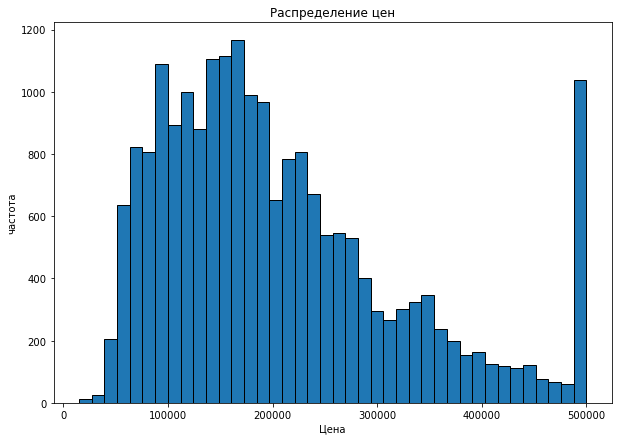

In [34]:
# место для ответа
plt.figure(figsize=(10, 7))
sns.histplot(df.median_house_value, bins = 40, alpha = 1);
plt.ylabel('частота')
plt.xlabel('Цена')
plt.title('Распределение цен');


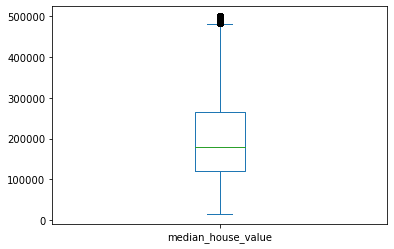

In [36]:
# место для ответа
df.median_house_value.plot(kind='box');

In [41]:
df['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [42]:
df['total_bedrooms'].mode().values[0]

280.0

In [44]:
not_null_bedrooms = df[~df['total_bedrooms'].isna()]
not_null_bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


In [45]:
not_null_bedrooms['total_bedrooms'].mean()##we will fill null values with mean cuz there is no significant ouliers

537.8705525375618

In [46]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(not_null_bedrooms['total_bedrooms'].mean())

In [47]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Задание 3. Визуализация данных

Постройте графики для каждого атрибута из списка, указанного вами, чтобы лучше понять распределение данных и их корреляции. Нарисуйте корреляционную матрицу для этих атрибутов, чтобы лучше понять, как они связаны друг с другом.



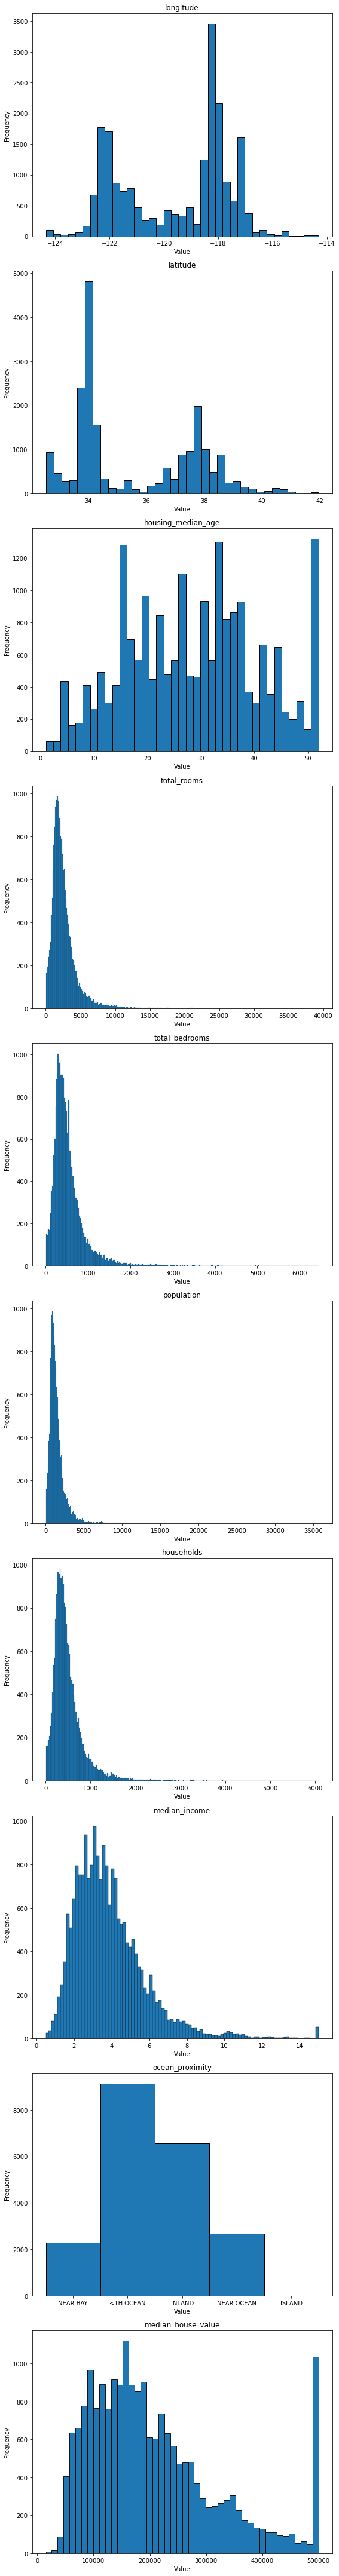

In [64]:
# место для ответа
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(8, 6 * len(df.columns)))

for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[col], ax=ax, alpha=1)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [66]:
numerical_df = df.select_dtypes(include='number')
numerical_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [68]:
corr_matrix = numerical_df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


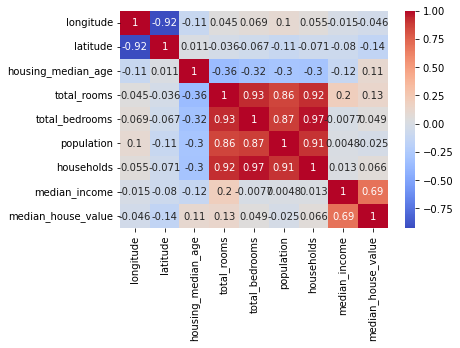

In [104]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm');

Анализ распределения целевого значения

a. Исследуйте распределение целевой переменной ('median_house_value') с помощью гистограммы или функции плотности распределения. Используйте библиотеку `matplotlib` или `seaborn` для визуализации.

b. Выведите основные статистические характеристики целевой переменной, включая минимум, максимум, среднее, медиану и стандартное отклонение.

c. Проверьте целевую переменную на скошенность (асимметрию).

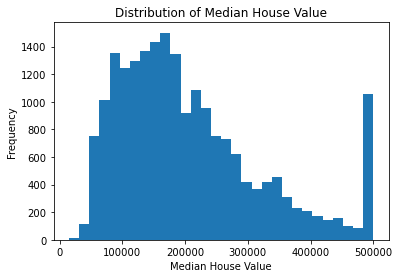

In [70]:
# место для ответа
plt.hist(df['median_house_value'], bins=30)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()


In [75]:
stats = df['median_house_value'].describe();
print(stats)

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


# Задание 4. Подготовка данных для модели

Разделите данные на обучающий (train), тестовый (test) и валидационный (valid) наборы. Если вы обнаружили, что распределение целевой переменной скошено, может быть полезно применить логарифмическую трансформацию.

a. Примените логарифмическую трансформацию к целевой переменной с использованием функции `numpy`.

b. Повторите анализ распределения (как в задании 3) для преобразованной целевой переменной.

c. Если модель будет обучаться лучше на преобразованных данных, используйте логарифмически преобразованный столбец в качестве новой целевой переменной.

Пожалуйста, обратите внимание, что если вы решите использовать логарифмически преобразованные данные в качестве целевой переменной, вам потребуется преобразовать предсказания модели обратно в исходную шкалу перед интерпретацией.

Text(0.5, 0, 'логарифически трансформированная цена')

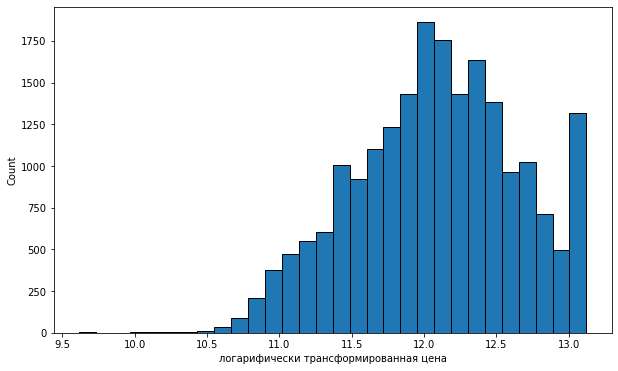

In [82]:
# место для ответа
log_mhv = np.log1p(df.median_house_value)
plt.figure(figsize = (10, 6))

sns.histplot(log_mhv, bins = 30, alpha = 1);
plt.xlabel('логарифически трансформированная цена')

In [83]:
log_mhv.describe()

count    20640.000000
mean        12.084891
std          0.569131
min          9.615805
25%         11.691916
50%         12.099050
75%         12.486451
max         13.122367
Name: median_house_value, dtype: float64

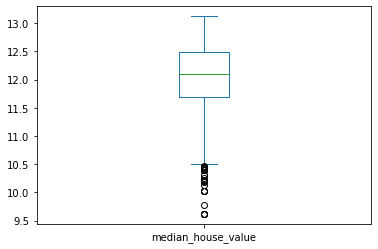

In [85]:
log_mhv.plot(kind='box');

In [101]:
#let's prepare a copy of original df with target column replaced with log transormed values:
df_with_log = df.copy()
df_with_log['median_house_value'] = log_mhv
df_with_log = df_with_log.rename(columns={'median_house_value': 'log_mhv'})
df_with_log

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,log_mhv
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,13.022766
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,12.789687
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,12.771673
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,12.740520
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,12.743154
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,11.265758
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,11.252872
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,11.432810
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,11.346883


In [88]:
from sklearn.model_selection import train_test_split
X_train, x_test_and_valid, y_train, y_test_and_valid = train_test_split(df[df.columns[:-1]], df.median_house_value, test_size = 0.4, random_state = 42)

In [90]:
y_train

9012     448100.0
2769      53800.0
1953     111300.0
16897    500001.0
17866    252200.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 12384, dtype: float64

In [93]:
X_test, X_valid, y_test, y_valid = train_test_split(x_test_and_valid, y_test_and_valid, test_size = 0.5, random_state = 42)

In [94]:
len(X_train), len(X_test), len(X_valid)

(12384, 4128, 4128)

In [95]:
len(y_train), len(y_test), len(y_valid)

(12384, 4128, 4128)

# Задание 5. Обучение модели

Используйте линейную регрессию из библиотеки `sklearn` для обучения модели на обучающем наборе данных. Для этого воспользуйтесь классом `LinearRegression` из модуля `sklearn.linear_model`. Обучите модель, используя все остальные атрибуты, кроме '`median_house_value`', чтобы предсказать '`median_house_value`'.



In [102]:
# место для ответа
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [103]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9012,-118.63,34.11,35.0,3795.0,690.0,1521.0,653.0,5.8735,<1H OCEAN
2769,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,INLAND
1953,-120.78,38.74,28.0,4236.0,877.0,2008.0,881.0,2.1603,INLAND
16897,-122.37,37.58,43.0,2506.0,432.0,967.0,428.0,4.7404,NEAR OCEAN
17866,-121.92,37.45,10.0,3937.0,1054.0,2032.0,1002.0,3.2617,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [106]:
feature_columns = ['housing_median_age','total_rooms','median_income']
X_train, X_test = X_train[feature_columns], X_test[feature_columns]

In [107]:
X_train

,housing_median_age,total_rooms,median_income
9012,35.0,3795.0,5.8735
2769,8.0,240.0,1.4688
1953,28.0,4236.0,2.1603
16897,43.0,2506.0,4.7404
17866,10.0,3937.0,3.2617
...,...,...,...
11284,35.0,1330.0,6.3700
11964,33.0,3084.0,3.0500
5390,36.0,2101.0,2.9344
860,15.0,3575.0,5.7192


In [108]:
model = LinearRegression()

In [110]:
model.fit(X_train, y_train)

LinearRegression()

In [111]:
pred = model.predict(X_test)
pred

array([143729.60726805, 216739.62686486, 140587.02383134, ...,
       161847.80337928, 193036.23760109, 189697.80096467])

# Задание 6. Оценка модели

Оцените вашу модель на тестовом наборе данных, используя подходящие метрики для оценки модели линейной регрессии из библиотеки sklearn. Используйте функции, такие как `mean_squared_error`, `mean_absolute_error` и `r2_score` из модуля `sklearn.metrics`.

In [113]:
# место для ответа
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [114]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  60552.39975931269
MSE:  6533629093.965565
R2 score:  0.010172913381498505


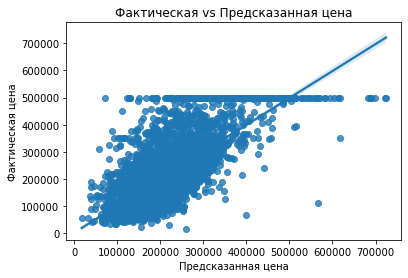

In [115]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Предсказанная цена")
plt.ylabel('Фактическая цена')
plt.title("Фактическая vs Предсказанная цена")
plt.show()

In [116]:
##let's try out to use log transormed target:
X_train_log, x_test_and_valid_log, y_train_log, y_test_and_valid_log = train_test_split(df_with_log[df_with_log.columns[:-1]], df_with_log.log_mhv, test_size = 0.4, random_state = 42)

In [117]:
X_test_log, X_valid_log, y_test_log, y_valid_log = train_test_split(x_test_and_valid_log, y_test_and_valid_log, test_size = 0.5, random_state = 42)

In [118]:
X_train_log, X_test_log = X_train_log[feature_columns], X_test_log[feature_columns]

In [120]:
y_train_log

9012     13.012774
2769     10.893047
1953     11.619994
16897    13.122367
17866    12.437982
           ...    
11284    12.342355
11964    11.490690
5390     12.310888
860      12.554971
15795    12.691584
Name: log_mhv, Length: 12384, dtype: float64

In [121]:
model.fit(X_train_log, y_train_log)

LinearRegression()

In [122]:
pred_log = model.predict(X_test_log)
pred_log

array([11.77931384, 12.11444637, 11.78789934, ..., 11.88259752,
       12.0252173 , 12.00250819])

In [123]:
print("MAE: ", (metrics.mean_absolute_error(pred_log, y_test_log)))
print("MSE: ", (metrics.mean_squared_error(pred_log, y_test_log)))
print("R2 score: ", (metrics.r2_score(pred_log, y_test_log)))

MAE:  0.3273333660266182
MSE:  0.17759018228154555
R2 score:  -0.21701257182836975


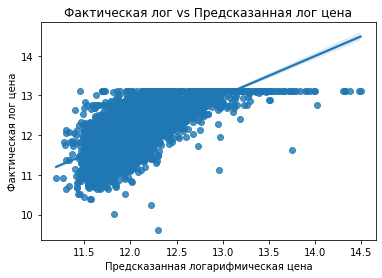

In [124]:
sns.regplot(x=pred_log, y=y_test_log)
plt.xlabel("Предсказанная логарифмическая цена")
plt.ylabel('Фактическая лог цена')
plt.title("Фактическая лог vs Предсказанная лог цена")
plt.show()

# Задание 7. Интерпретация результатов

Объясните свои результаты. Какие атрибуты были наиболее важными в вашей модели? Как вы можете использовать эту информацию в реальной жизни?

In [ ]:
# место для ответа
исходя из тепловой карты heatmap на основе таблицы корреляции я ввзял признаки наиболее коррелирующие с таргетом median_house_value
но судя из ошибки R2 это не совсем хорошая модель, так как предсказания не близки

# Задание 8 (бонус). Улучшение модели

Попробуйте улучшить качество вашей модели, проведя более тщательную предварительную обработку данных и/или настройку модели. Вот некоторые идеи, которые вы можете рассмотреть:

a. Обработка пропущенных значений: Исследуйте данные на предмет пропущенных значений. Вы уже заменили их на медиану, но может быть есть более интеллектуальный способ заполнения пропусков, который поможет улучшить модель.

b. Обработка аномалий и выбросов: Исследуйте данные на предмет аномалий и выбросов, которые могут искажать результаты модели. Используйте подходящие методы обработки, например, обрезание, замену на медианные значения или удалять эти аномалии.

c. Выбор признаков: Возможно, некоторые признаки не так важны для прогнозирования 'median_house_value'. Попробуйте обучить модель на подмножестве признаков и проверьте, улучшается ли качество модели.

d. Проверка на различных наборах данных: Проверьте работоспособность вашей модели, используя различные наборы данных для обучения и тестирования (измените параметр random_state при разделении данных). Это поможет вам понять, насколько надежна ваша модель при обобщении на новые данные.

Вашей целью является создание модели, которая обеспечивает наиболее точные предсказания 'median_house_value'. Не забудьте повторить оценку модели после каждого шага, чтобы вы могли сравнить эффективность различных подходов.



In [ ]:
# место для ответа